#           Projeto Inteligência Computacional





###  Carregamento dos dados, p1
---



In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import datasets


iris = datasets.load_iris()

X = iris.data
Y = iris.target


### Pré-processamento dos dados carregados, p2

---

In [4]:
from sklearn import preprocessing

#Usando a função scale, para fazer o pre-processamento dos dados
preprocessing.scale(X)
#Normalizando os dados
maxdata=max(X[0])
X = X/maxdata
#Separamos aqui os nossos dados para ser usado no treino e no teste
X_train, X_test, Y_train, Y_test = train_test_split( X ,Y ,random_state = 300,test_size=0.3)



### Execução do k-means com os dados pré-processados, p3

---



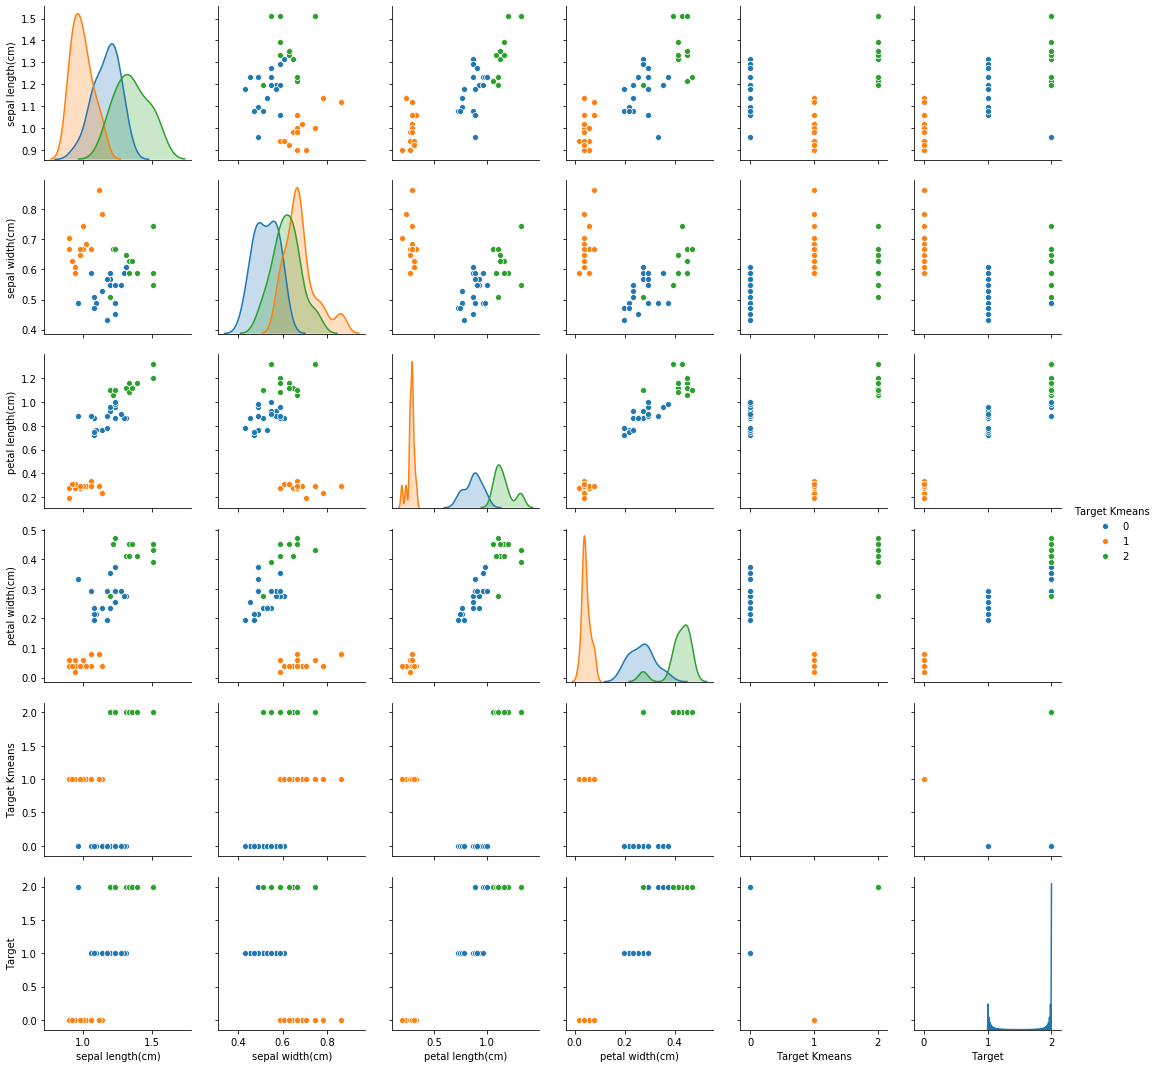

In [6]:
from sklearn.cluster import KMeans
import seaborn as sb
kmeans = KMeans( n_clusters=3, random_state=300).fit(X_train)

Y_predict = kmeans.predict(X_test)

df2= pd.DataFrame(X_test)
df2 = df2.rename(columns={0:"sepal length(cm)",1:"sepal width(cm)",2:"petal length(cm)",3:"petal width(cm)"})
df2["Target Kmeans"] = Y_predict
df2["Target"] = Y_test

sb.pairplot(df2, hue ="Target Kmeans")


In [8]:
kmeans.cluster_centers_

array([[1.14565826, 0.54295051, 0.85620915, 0.28618114],
       [0.97647059, 0.66946779, 0.28795518, 0.0487395 ],
       [1.33963585, 0.59733894, 1.10714286, 0.39635854]])

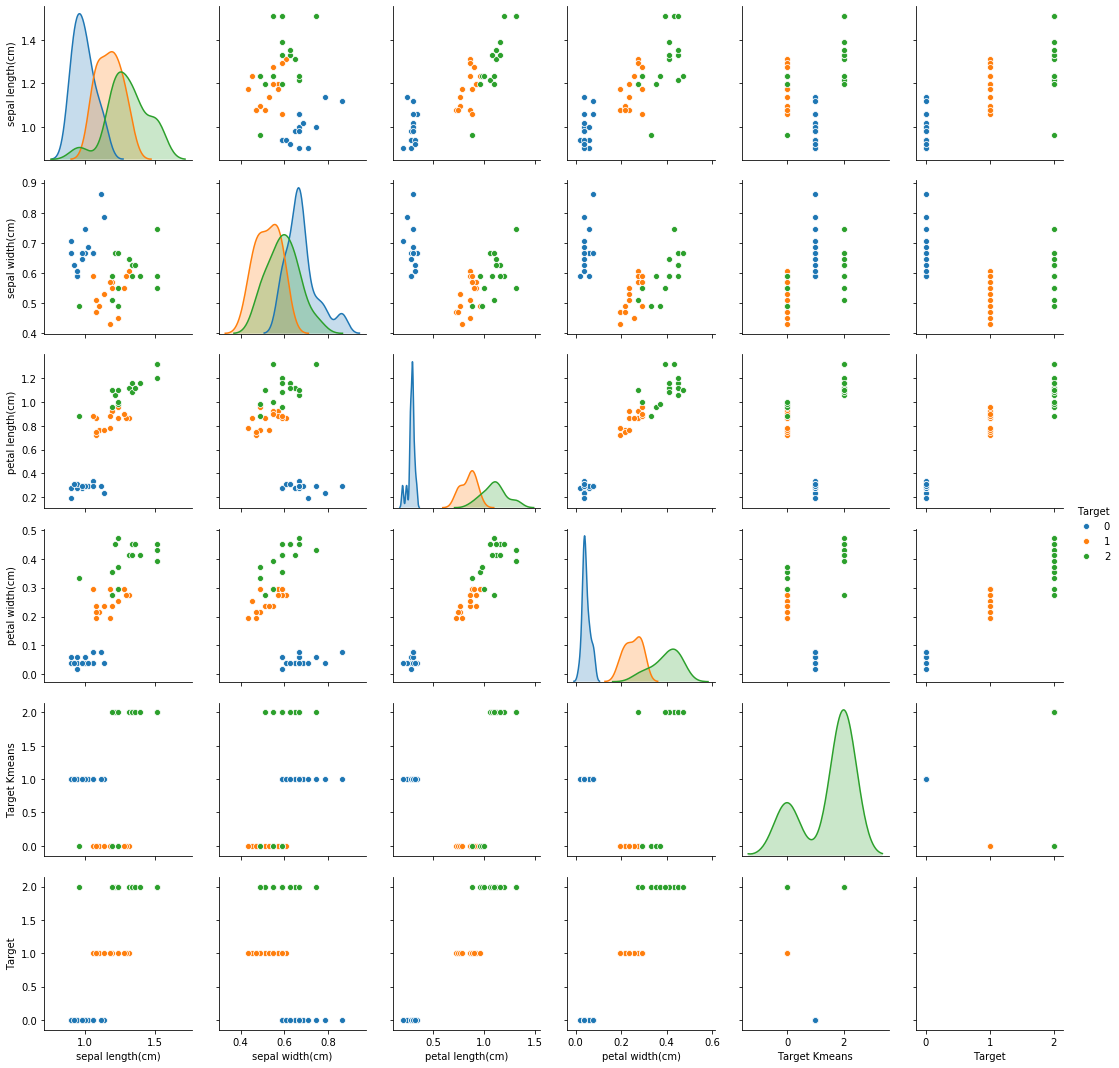

In [10]:
sb.pairplot(df2, hue = "Target")

### Análise dos resultados obtidos com o k-means, p4
---


In [12]:
print(classification_report(Y_test, Y_predict))

precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        15
           2       1.00      0.73      0.85        15

    accuracy                           0.24        45
   macro avg       0.33      0.24      0.28        45
weighted avg       0.33      0.24      0.28        45



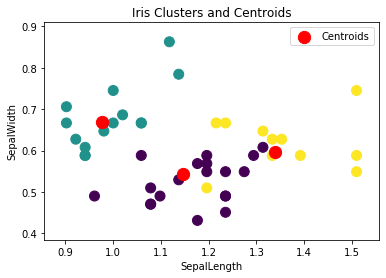

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], X_test[:,1], s = 100, c = Y_predict)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'red',label = 'Centroids')
plt.title('Iris Clusters and Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

plt.show()


# Kmeans


In [16]:
# calcula a qualidade do agrupamento (quanto menor, melhor é)
def funcObjetivo(c,z,data):
    N,n = data.shape
    J=0
    for i in range(N):
        J=J+linalg.norm(data[i,:]-z[c[i],:])**2
    return J/N

In [18]:
# problema 1: dado z, calcular c
def agrupar(z,k,data):
    N,n = data.shape
    c = zeros(N,dtype=int)
    for i in range(N):
        distancias=zeros(k)
        for j in range(k):
            distancias[j]=linalg.norm(z[j,:]-data[i,:])
        c[i] = argmin(distancias)
    for i in range(k):
        if sum(c==i)==0: # verifica se todos os grupos tem pelo menos um vetor
            print('Grupo',i,'não tem elementos.')
            assert 0
    return c

In [20]:
# problema 2: dado c, calcular z
def representantes(c,k,data):
    N,n = data.shape
    z = zeros((k,n))
    for i in range(k):
        onde = where(c==i)
        onde = squeeze(onde)
        Xk = data[onde,:]
        Nk = Xk.shape[0]
        z[i,:] = sum(Xk,axis=0)
        z[i,:] = z[i,:]/Nk
    return z


In [22]:
def sorteio_representantes(k,data):
    N,n=data.shape
    while True:
        r=random.randint(0,N,k)
        r.sort()
        b=r[1:]
        a=r[:-1]
        c=a<b
        if sum(c)==len(c):
            break
    z=data[r,:]
    return z,r

In [24]:
def kmeans01(data,k,maxiter,epsilon,sortear=True,r=0):
    N,n=data.shape
    J=zeros(maxiter)

    if sortear: # inicializa com z sorteado a partir dos vetores em data
        z,r=sorteio_representantes(k,data)
    else:
        z=data[r,:]

    c = agrupar(z,k,data)
    J[0]=funcObjetivo(c,z,data)
    z=representantes(c,k,data)

    for i in range(1,maxiter):
        c = agrupar(z,k,data)
        J[i]=funcObjetivo(c,z,data)
        print('iter=',i,'\t\tJ=',J[i])
        if J[i]==J[i-1]: #abs(J[i]-J[i-1])/J[i]<epsilon:
            J=J[0:i+1]
            print('kmeans converge em',i,'iterações e J*=',J[i],'.')
            return r,c,J
        z=representantes(c,k,data)

    print('kmeans atinge o número máximo de iterações',maxiter,'.')
    return r,c,J


Tem 50 zeros.
Tem 50 uns.
Tem 50 dois.
No total são 150 dígitos.
No total são 150 dígitos.
rodada= 0
iter= 1 		J= 0.039541509969004865
iter= 2 		J= 0.021716399937396935
iter= 3 		J= 0.021449928207655473
iter= 4 		J= 0.021221374990646417
iter= 5 		J= 0.020900577415024445
iter= 6 		J= 0.020711617582980905
iter= 7 		J= 0.020472531035399984
iter= 8 		J= 0.02033688687564442
iter= 9 		J= 0.02022845308784371
iter= 10 		J= 0.020211627790843862
iter= 11 		J= 0.020211627790843862
kmeans converge em 11 iterações e J*= 0.020211627790843862 .
rodada= 1
iter= 1 		J= 0.021173090519479285
iter= 2 		J= 0.020900577415024445
iter= 3 		J= 0.020711617582980905
iter= 4 		J= 0.020472531035399984
iter= 5 		J= 0.02033688687564442
iter= 6 		J= 0.02022845308784371
iter= 7 		J= 0.020211627790843862
iter= 8 		J= 0.020211627790843862
kmeans converge em 8 iterações e J*= 0.020211627790843862 .
rodada= 2
iter= 1 		J= 0.020695430160525326
iter= 2 		J= 0.02025171061405731
iter= 3 		J= 0.020210545027847245
iter= 4 		J= 

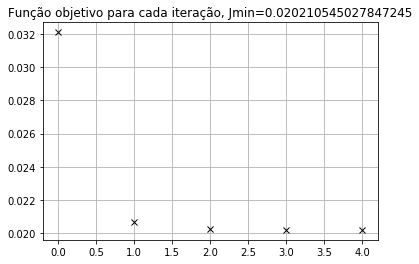

In [26]:
from numpy import *
etiquetas=Y
imagens=X
onde0 = squeeze(where(etiquetas==0)) # índices onde tem 0
onde1 = squeeze(where(etiquetas==1)) # índices onde tem 1
onde2 = squeeze(where(etiquetas==2)) # índices onde tem 2
onde = concatenate((onde0,onde1,onde2))
X=imagens[onde]
N,n=X.shape
print('Tem',len(onde0),'zeros.')
print('Tem',len(onde1),'uns.')
print('Tem',len(onde2),'dois.')
print('No total são',N,'dígitos.')
#savetxt('ic10datasetMNIST.txt',X,delimiter='\t',newline='\n')
#N,n=data.shape
print('No total são',N,'dígitos.')

normalizar=True 
if normalizar:
    maxdata=max(X[0])
    X = X/maxdata

k=3
maxiter=100
epsilon=1e-6
Jmin=1e30
rmin=zeros(k) # vou guardar o chute inicial dos z que atinge o menor J.
for i in range(10):
    print('rodada=',i)
    r,c,J=kmeans01(X,k,maxiter,epsilon)
    if min(J)<Jmin:
        Jmin=min(J)
        rmin=r


r,c,J=kmeans01(X,k,maxiter,epsilon,sortear=False,r=rmin)
plt.figure()
plt.grid()
plt.title('Função objetivo para cada iteração, Jmin='+str(min(J)))
plt.plot(J,'kx')


z=representantes(c,k,X)
if normalizar:
    z=z*maxdata


In [28]:
ondetem0 = etiquetas==0

onde_kmeans = c==0
acertos=logical_and(ondetem0, onde_kmeans)
print("Acertos classe 0\n", sum(acertos)/len(acertos))

ondetem1 = etiquetas==1

onde_kmeans = c==1

acertos=logical_and(ondetem1, onde_kmeans)
print("Acertos classe 1\n", sum(acertos)/len(acertos))

ondetem2 = etiquetas==2

onde_kmeans = c==2

acertos=logical_and(ondetem2, onde_kmeans)
print("Acertos classe 2\n", sum(acertos)/len(acertos))

Acertos classe 0
 0.3333333333333333
Acertos classe 1
 0.32
Acertos classe 2
 0.24
